# Covid-19 Project

Data Source : 
Daily cases and deaths by date reported to WHO
Download link: https://covid19.who.int/WHO-COVID-19-global-data.csv

|Field name|	Type	|Description|
|----------|--------|-----------|
|Date_reported	|Date	|Date of reporting to WHO|
|Country_code	|String	|ISO Alpha-2 country code|
|Country	|String	|Country, territory, area|
|WHO_region	|String	|WHO regional offices:WHO Member States are grouped into six WHO regions -- Regional Office for Africa (AFRO), Regional Office for the Americas (AMRO), Regional Office for South-East Asia (SEARO), Regional Office for Europe (EURO), Regional Office for the Eastern Mediterranean (EMRO), and Regional Office for the Western Pacific (WPRO).
|New_cases	|Integer	|New confirmed cases. Calculated by subtracting previous |cumulative case count from current cumulative cases count.*|
|Cumulative_cases	|Integer	|Cumulative confirmed cases reported to WHO to date.|
|New_deaths	|Integer	|New confirmed deaths. Calculated by subtracting previous ||cumulative deaths from current cumulative deaths.*|
|Cumulative_deaths	|Integer	|Cumulative confirmed deaths reported to WHO to date.|

# Importing Libraries
  * Numpy ,Pandas , Matplotlib.pyplot , seaborn , sns.set , plotly.express

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px

# Exploring the Data
* From (https://covid19.who.int/WHO-COVID-19-global-data.csv)

In [5]:
df=pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-data.csv")
df2=pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-data.csv")
df.head(5)

Date_reported Country_code      Country WHO_region  New_cases  \
0    2020-01-03           AF  Afghanistan       EMRO          0   
1    2020-01-04           AF  Afghanistan       EMRO          0   
2    2020-01-05           AF  Afghanistan       EMRO          0   
3    2020-01-06           AF  Afghanistan       EMRO          0   
4    2020-01-07           AF  Afghanistan       EMRO          0   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0           0                  0  
1                 0           0                  0  
2                 0           0                  0  
3                 0           0                  0  
4                 0           0                  0

In [6]:
# Check Data Info :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264018 entries, 0 to 264017
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      264018 non-null  object
 1   Country_code       262904 non-null  object
 2   Country            264018 non-null  object
 3   WHO_region         264018 non-null  object
 4   New_cases          264018 non-null  int64 
 5   Cumulative_cases   264018 non-null  int64 
 6   New_deaths         264018 non-null  int64 
 7   Cumulative_deaths  264018 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 16.1+ MB


In [7]:
# We used ROUND to convert the output as float with zero decimal
# Solution 1 :
df.describe().round(0)
# Solution 2
pd.options.display.float_format='{:,.0f}'.format
df.describe()

New_cases  Cumulative_cases  New_deaths  Cumulative_deaths
count    264,018           264,018     264,018            264,018
mean       2,514         1,072,866          25             15,476
std       16,099         5,030,445         146             67,697
min      -12,838                 0      -2,437                  0
25%            0               953           0                 10
50%           16            23,360           0                288
75%          420           293,833           4              4,460
max    1,265,520       100,304,472      11,447          1,088,854

In [8]:
df.describe()

New_cases  Cumulative_cases  New_deaths  Cumulative_deaths
count    264,018           264,018     264,018            264,018
mean       2,514         1,072,866          25             15,476
std       16,099         5,030,445         146             67,697
min      -12,838                 0      -2,437                  0
25%            0               953           0                 10
50%           16            23,360           0                288
75%          420           293,833           4              4,460
max    1,265,520       100,304,472      11,447          1,088,854

# Duplicate Values

In [9]:
df.duplicated().sum()

0

# Missing Values

In [15]:
df.isnull().sum()

date_reported           0
country_code         1114
country                 0
who_region              0
new_cases               0
cumulative_cases        0
new_deaths              0
cumulative_deaths       0
dtype: int64

In [14]:
round(df.isnull().mean()*100.2)

date_reported       0
country_code        0
country             0
who_region          0
new_cases           0
cumulative_cases    0
new_deaths          0
cumulative_deaths   0
dtype: float64

In [12]:
# convert all columns name to be small (lower)
df.columns=df.columns.str.lower()
df.columns
df.sample(3)

date_reported country_code        country who_region  new_cases  \
163896    2020-05-20           NC  New Caledonia       WPRO          0   
77419     2021-07-09           FO  Faroe Islands       EURO         14   
254544    2021-07-08           UY        Uruguay       AMRO        733   

        cumulative_cases  new_deaths  cumulative_deaths  
163896                18           0                  0  
77419                820           0                  1  
254544            374019          24               5735

# Date_reported

In [13]:
df.columns

Index(['date_reported', 'country_code', 'country', 'who_region', 'new_cases',
       'cumulative_cases', 'new_deaths', 'cumulative_deaths'],
      dtype='object')

In [16]:
# Check Date datatype
df.date_reported.dtype

dtype('O')

In [17]:
df.date_reported.describe()

count         264018
unique          1114
top       2020-01-03
freq             237
Name: date_reported, dtype: object

In [18]:
# Check Max & Min of dates report :
df.date_reported.max(),df.date_reported.min()

('2023-01-20', '2020-01-03')

In [19]:
# To claulate some operation on dates , we must convert date to "datetime" fromat by Pandas.datetime :
df.date_reported=pd.to_datetime(df["date_reported"])
df.date_reported.dtype.type
df.info() # now date_reported converted to be "datetime64[ns]" as per df.info() function

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264018 entries, 0 to 264017
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date_reported      264018 non-null  datetime64[ns]
 1   country_code       262904 non-null  object        
 2   country            264018 non-null  object        
 3   who_region         264018 non-null  object        
 4   new_cases          264018 non-null  int64         
 5   cumulative_cases   264018 non-null  int64         
 6   new_deaths         264018 non-null  int64         
 7   cumulative_deaths  264018 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 16.1+ MB


In [20]:
# Some calculation Operations on date_reported after converted to datetime fomrat :
# 1- diff between Max,Min by normal solution :
df.date_reported.max()-df.date_reported.min()

Timedelta('1113 days 00:00:00')

In [21]:
# Solution diff of Max,Min using timedelta ('Y','M','W','D','h','m','s'):
total_period=df.date_reported.max()-df.date_reported.min()
total_years=total_period/np.timedelta64(1,'Y')
total_months=total_period/np.timedelta64(1,'M')
total_weeks=total_period/np.timedelta64(1,'W')
total_days=total_period/np.timedelta64(1,'D')
total_hours=total_period/np.timedelta64(1,'h')
total_minutes=total_period/np.timedelta64(1,'m')
total_seconde=total_period/np.timedelta64(1,'s')

print(f"total_period of : {round(total_years,2)}")
print(f"total_period of : {round(total_months,2)}")
print(f"total_period of : {round(total_weeks,2)}")
print(f"total_period of : {round(total_days,2)}")
print(f"total_period of : {round(total_hours,2)}")
print(f"total_period of : {round(total_minutes,2)}")
print(f"total_period of : {round(total_seconde,2)}")

total_period of : 3.05
total_period of : 36.57
total_period of : 159.0
total_period of : 1113.0
total_period of : 26712.0
total_period of : 1602720.0
total_period of : 96163200.0


In [22]:
# Solution 3 by library of "dateutil.relativdelta" :
from dateutil.relativedelta import relativedelta
relativedelta(df.date_reported.max(),df.date_reported.min())

relativedelta(years=+3, days=+17)

In [23]:
# Solution 4 using today/now function from datetime library :
from datetime import datetime

period_now=datetime.now()
period_today=datetime.today()

total_period_now=period_now-df.date_reported.min()
total_period_today=period_today-df.date_reported.min()

print("Period_now : ",datetime.now())
print("Period_today : ",datetime.today(),"\n")
print("Total_period_now : ",total_period_now)
print("Total_period_now : ",total_period_now)

Period_now :  2023-01-21 12:00:41.445598
Period_today :  2023-01-21 12:00:41.445599 

Total_period_now :  1114 days 12:00:41.433599
Total_period_now :  1114 days 12:00:41.433599


# Country_code and Country

In [24]:
# as last check of missing data , we found about 1105 related to country_code
df.isnull().sum()

date_reported           0
country_code         1114
country                 0
who_region              0
new_cases               0
cumulative_cases        0
new_deaths              0
cumulative_deaths       0
dtype: int64

In [25]:
#By Check number of unique (مكرر) codes by nunique, we found that thier is a country without code
df.country_code.nunique(),df.country.nunique()

(236, 237)

In [26]:
# here we see that Namibia that has null value in country_code , So the action will be drop :
df[df["country_code"].isnull()]

date_reported country_code  country who_region  new_cases  \
159302    2020-01-03          NaN  Namibia       AFRO          0   
159303    2020-01-04          NaN  Namibia       AFRO          0   
159304    2020-01-05          NaN  Namibia       AFRO          0   
159305    2020-01-06          NaN  Namibia       AFRO          0   
159306    2020-01-07          NaN  Namibia       AFRO          0   
...              ...          ...      ...        ...        ...   
160411    2023-01-16          NaN  Namibia       AFRO          0   
160412    2023-01-17          NaN  Namibia       AFRO          0   
160413    2023-01-18          NaN  Namibia       AFRO          0   
160414    2023-01-19          NaN  Namibia       AFRO          0   
160415    2023-01-20          NaN  Namibia       AFRO          0   

        cumulative_cases  new_deaths  cumulative_deaths  
159302                 0           0                  0  
159303                 0           0                  0  
159304                 0           0                  0  
159305                 0           0                  0  
159306                 0           0                  0  
...                  ...         ...                ...  
160411            170479           0               4083  
160412            170479           0               4083  
160413            170479           0               4083  
160414            170479           0               4083  
160415            170479           0               4083  

[1114 rows x 8 columns]

In [27]:
df.isnull().sum()

date_reported           0
country_code         1114
country                 0
who_region              0
new_cases               0
cumulative_cases        0
new_deaths              0
cumulative_deaths       0
dtype: int64

In [28]:
df.columns

Index(['date_reported', 'country_code', 'country', 'who_region', 'new_cases',
       'cumulative_cases', 'new_deaths', 'cumulative_deaths'],
      dtype='object')

In [29]:
# let's list all countries wa have and check for "egypt"
df.country.unique()
'Egypt' in df.country.unique()

True

In [30]:
df[df.country=='Egypt'].shape

(1114, 8)

# Filter by Country

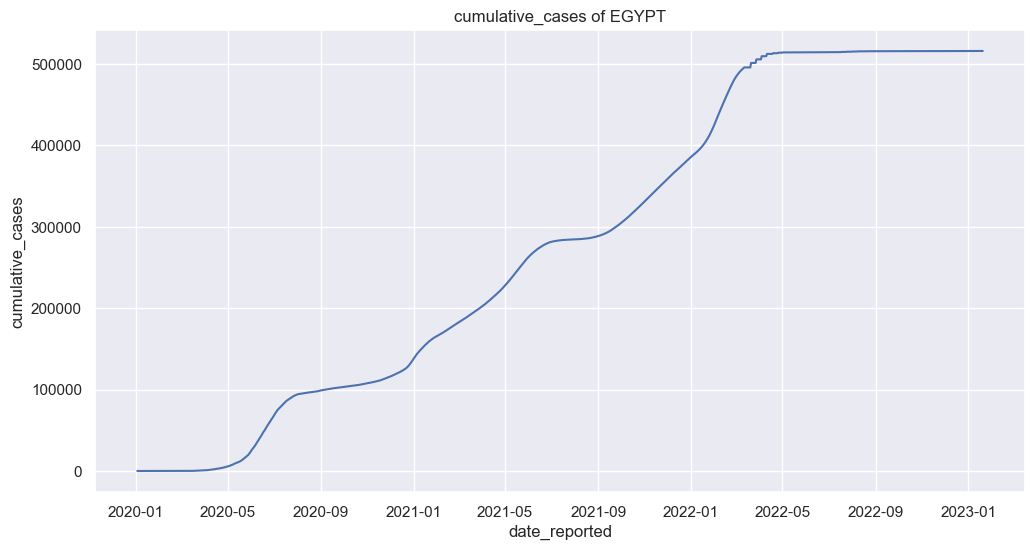

In [31]:
# cumulative_cases in egypt 
plt.figure(figsize=(12,6))
sns.lineplot(x='date_reported',y='cumulative_cases',data=df[df.country=='Egypt'])
plt.title("cumulative_cases of EGYPT")
plt.show()

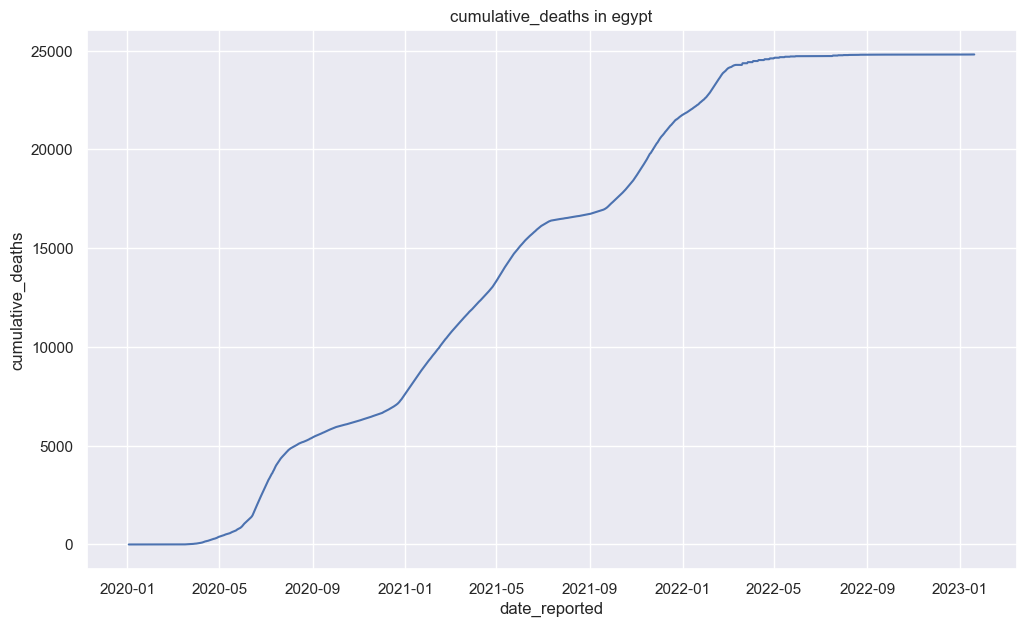

In [32]:
# cumulative_deaths in egypt
plt.figure(figsize=(12,7))
sns.lineplot(x='date_reported',y='cumulative_deaths',data=df[df.country=='Egypt'])
plt.title('cumulative_deaths in egypt')
plt.show()

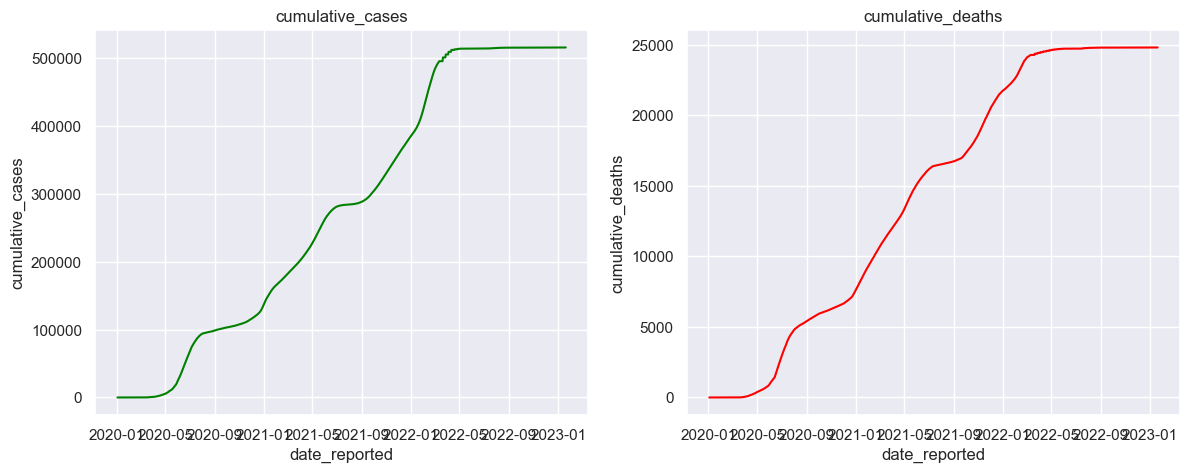

In [33]:
# cumulative_cases vs cumulative_deaths in egypt
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.lineplot(x='date_reported',y='cumulative_cases',data=df[df.country=='Egypt'],ax=ax[0],color='green')
sns.lineplot(x='date_reported',y='cumulative_deaths',data=df[df.country=='Egypt'],ax=ax[1],color='red')
ax[0].set_title('cumulative_cases')
ax[1].set_title('cumulative_deaths')
plt.show()

In [34]:
# sns.lineplot(x='year',y='cumulative_cases',data=df[df.country=='Egypt'],color='green')
# df.groupby('year')['cumulative_cases'].sum()
df.columns

Index(['date_reported', 'country_code', 'country', 'who_region', 'new_cases',
       'cumulative_cases', 'new_deaths', 'cumulative_deaths'],
      dtype='object')

In [35]:
# cumulative_cases vs cumulative_deaths in egypt using plotly express
# 1) cumulative_cases in egypt 
px.line(df[df.country=='Egypt'],x='date_reported',y='cumulative_cases',title='cumulative_cases of Egypt',width=950,height=500)

In [36]:
# cumulative_cases vs cumulative_deaths in egypt using plotly express
# 2) cumulative_deaths in egypt

px.line(df[df.country=='Egypt'],x='date_reported',y='cumulative_deaths',title='cumulative_deaths of Egypt',width=950,height=500)

In [37]:
# to generalize the concept , below function to explore the plotly express by any selected country :
def cumu_cases(country):
    print(f"cumulative_cases of {country}'s data describe:\n",df[df.country==country]['cumulative_cases'].describe())
    fig=px.line(df[df.country==country],x='date_reported',y='cumulative_cases',title=f'cumulative_cases of {country}',width=950,height=500)
    fig.show()

def cumu_deaths(country):
    print(f"cumulative_deaths of {country}'s data describe:\n",df[df.country==country]['cumulative_deaths'].describe())
    fig=px.line(df[df.country==country],x='date_reported',y='cumulative_deaths',title=f'cumulative_deaths of {country}',width=950,height=500)
    fig.show()

In [38]:
cumu_cases("United States of America")
cumu_deaths("United States of America")

cumulative_cases of United States of America's data describe:
 count         1,114
mean     43,248,009
std      34,986,899
min               0
25%       7,534,960
50%      33,684,646
75%      79,935,684
max     100,304,472
Name: cumulative_cases, dtype: float64


cumulative_deaths of United States of America's data describe:
 count       1,114
mean      590,387
std       371,113
min             0
25%       215,110
50%       603,756
75%       984,308
max     1,088,854
Name: cumulative_deaths, dtype: float64


In [39]:
# to generalize the concept , below function to explore the plotly express by any selected country within select period :
def cumu_cases_p(country,start_date,end_date):
    print(f"cumulative_cases of {country}'s data describe:\n",df[df.country==country]['cumulative_cases'].describe())
    data=df[(df.country==country) & (df.date_reported>=start_date) & (df.date_reported<=end_date)]
    fig=px.line(data,x='date_reported',y='cumulative_cases',title=f'cumulative_cases of {country} from {start_date} to {end_date}',width=950,height=500,markers=True)
    fig.show()

def cumu_deaths_p(country,start_date,end_date):
    print(f"cumulative_deaths of {country}'s data describe:\n",df[df.country==country]['cumulative_deaths'].describe())
    data=df[(df.country==country) & (df.date_reported>=start_date) & (df.date_reported<=end_date)]
    fig=px.line(data,x='date_reported',y='cumulative_cases',title=f'cumulative_deaths of {country} from {start_date} to {end_date}',width=950,height=500,markers=True)
    fig.show()

In [40]:
cumu_cases_p("Egypt","2022-06-01","2022-12-31")
cumu_deaths_p("Egypt","2022-06-01","2022-12-31")

cumulative_cases of Egypt's data describe:
 count     1,114
mean    277,499
std     188,610
min           0
25%     103,935
50%     283,157
75%     511,977
max     515,580
Name: cumulative_cases, dtype: float64


cumulative_deaths of Egypt's data describe:
 count    1,114
mean    14,393
std      9,148
min          0
25%      6,003
50%     16,400
75%     24,522
max     24,805
Name: cumulative_deaths, dtype: float64


# Filter by year

In [41]:
# As below we created now two columns for Month & Year using datetime function
df['year']=df.date_reported.dt.year
df['month']=df.date_reported.dt.month

# chekc new columns year,month
df.head(5)

date_reported country_code      country who_region  new_cases  \
0    2020-01-03           AF  Afghanistan       EMRO          0   
1    2020-01-04           AF  Afghanistan       EMRO          0   
2    2020-01-05           AF  Afghanistan       EMRO          0   
3    2020-01-06           AF  Afghanistan       EMRO          0   
4    2020-01-07           AF  Afghanistan       EMRO          0   

   cumulative_cases  new_deaths  cumulative_deaths  year  month  
0                 0           0                  0  2020      1  
1                 0           0                  0  2020      1  
2                 0           0                  0  2020      1  
3                 0           0                  0  2020      1  
4                 0           0                  0  2020      1

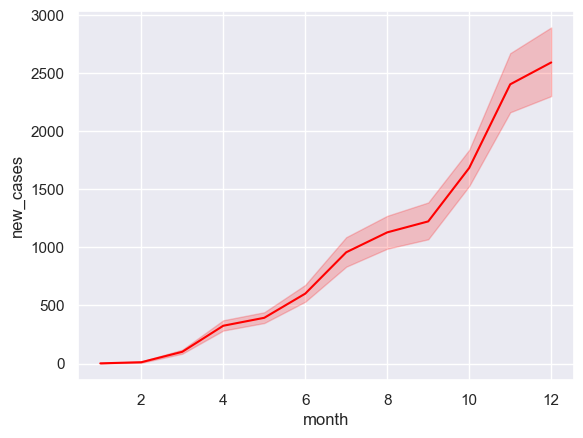

In [42]:
# Here using lieplot explain monthes per year of 2020 for new cases :
sns.lineplot(x='month',y='new_cases',data=df[df.year == 2020],color='red');

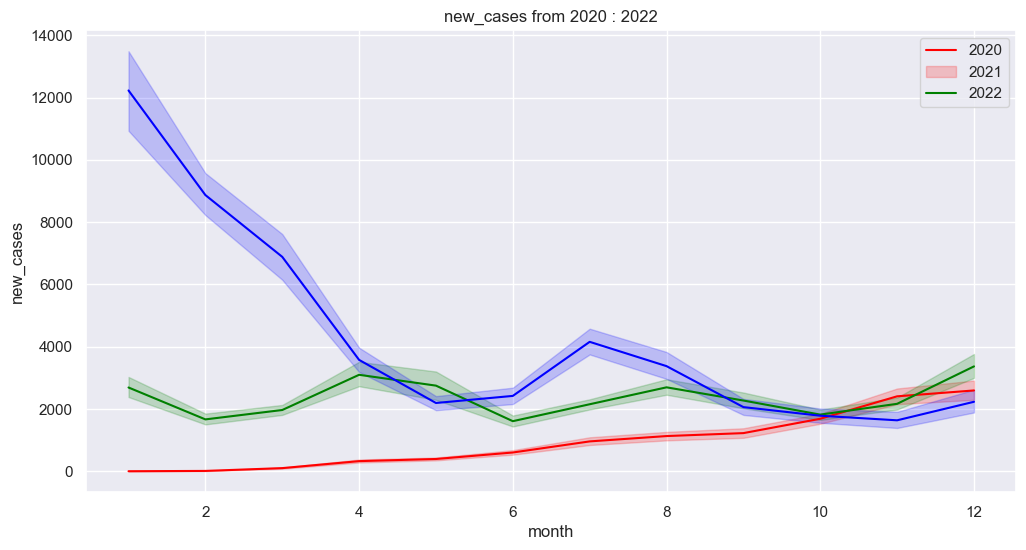

In [43]:
# now will do the same but for 2020 to 2023 on the same graph
plt.figure(figsize=(12,6))
sns.lineplot(x='month',y='new_cases',data=df[df.year==2020],color='red')
sns.lineplot(x='month',y='new_cases',data=df[df.year==2021],color='green')
sns.lineplot(x='month',y='new_cases',data=df[df.year==2022],color='blue')
plt.title('new_cases from 2020 : 2022')
plt.legend(['2020','2021','2022'])

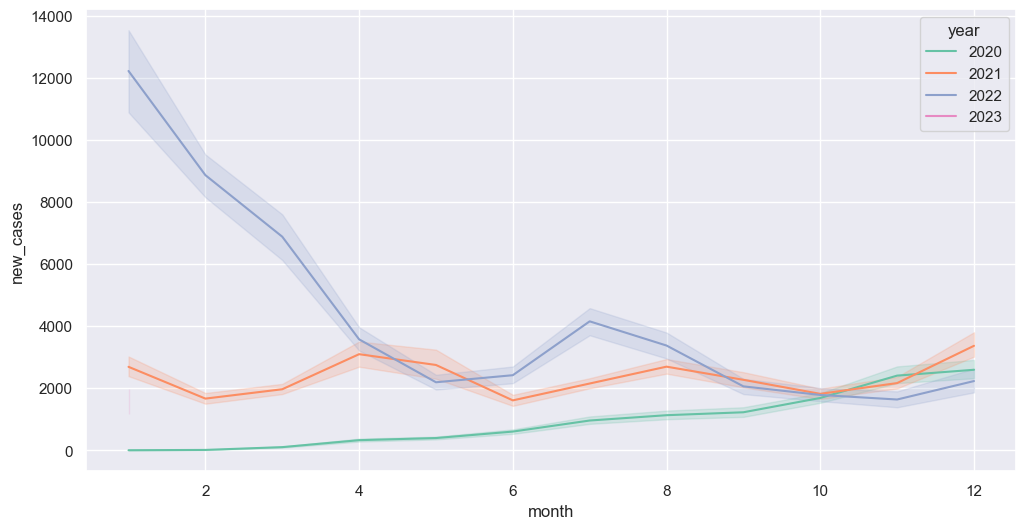

In [44]:
# another easy way for new_cases per year :
plt.figure(figsize=(12,6))
sns.lineplot(x='month',y='new_cases',hue='year',data=df,palette='Set2');

# Total Cases

In [45]:
# check numbers new cases of 2022 per month 
df[df.year==2022].groupby('month')['new_cases'].mean()

month
1    12,227
2     8,869
3     6,885
4     3,576
5     2,192
6     2,420
7     4,156
8     3,376
9     2,060
10    1,783
11    1,636
12    2,231
Name: new_cases, dtype: float64

In [46]:
# check numbers new cases of year
df.groupby('year')['new_cases'].sum().astype(float)

year
2020    82,937,081
2021   204,180,297
2022   369,119,178
2023     7,403,830
Name: new_cases, dtype: float64

In [47]:
df.groupby('year')['new_cases'].mean().astype(float)

year
2020     961
2021   2,360
2022   4,267
2023   1,562
Name: new_cases, dtype: float64

Text(0.5, 1.0, 'Month in Year New Cases')

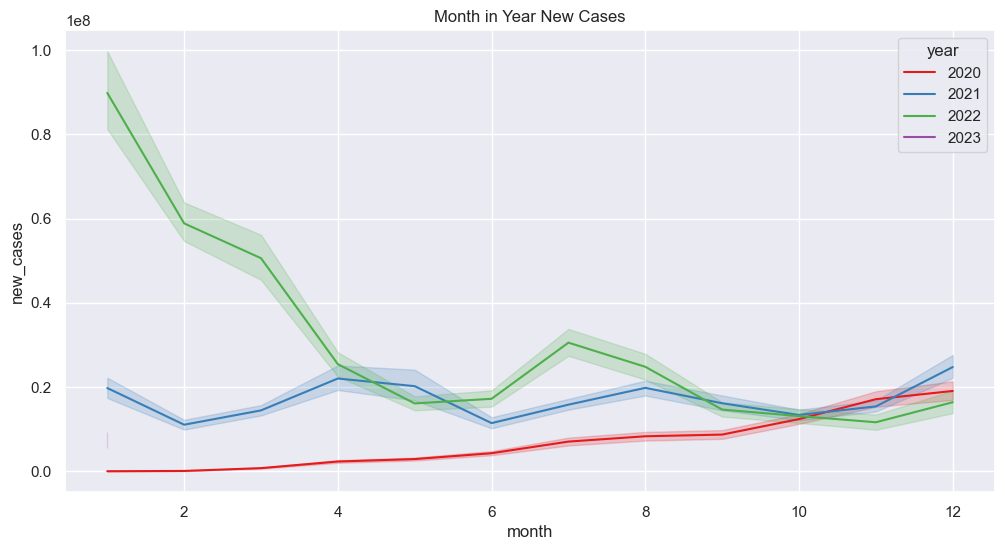

In [48]:
# using linepolt view sum of new cases (month in year):
plt.figure(figsize=(12,6))
sns.lineplot(x='month',y='new_cases',data=df,hue='year',palette='Set1',estimator=np.sum)
plt.title('Month in Year New Cases')

Text(0.5, 1.0, 'Month in Year new_deaths')

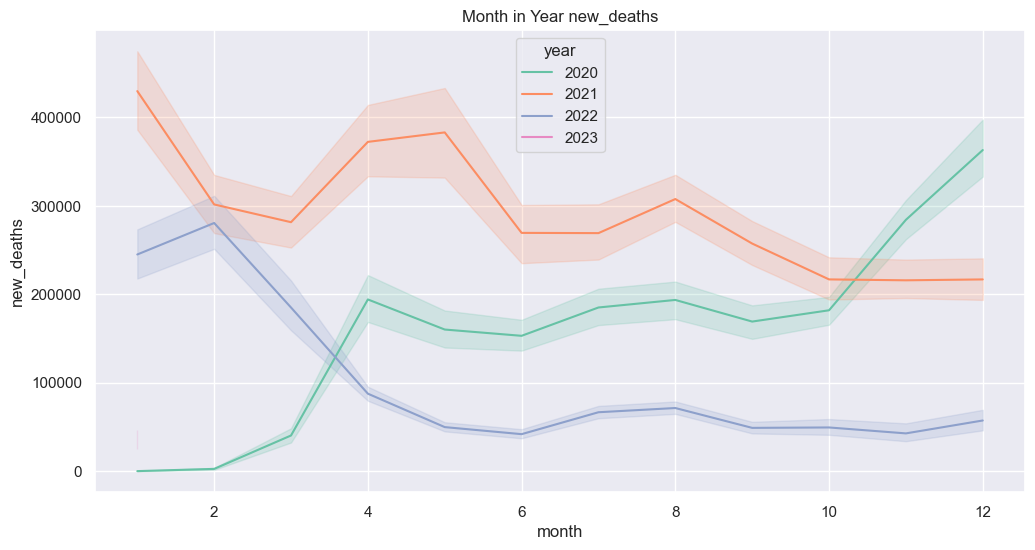

In [49]:
# using linepolt view sum of Death cases (month in year):
plt.figure(figsize=(12,6))
sns.lineplot(x='month',y='new_deaths',data=df,hue='year',palette='Set2',estimator=np.sum)
plt.title('Month in Year new_deaths')

In [50]:
# create new column contains month & year by (date to period ):
df['month_year']=df.date_reported.dt.to_period('M').astype(str)

In [51]:
df.head(10)

date_reported country_code      country who_region  new_cases  \
0    2020-01-03           AF  Afghanistan       EMRO          0   
1    2020-01-04           AF  Afghanistan       EMRO          0   
2    2020-01-05           AF  Afghanistan       EMRO          0   
3    2020-01-06           AF  Afghanistan       EMRO          0   
4    2020-01-07           AF  Afghanistan       EMRO          0   
5    2020-01-08           AF  Afghanistan       EMRO          0   
6    2020-01-09           AF  Afghanistan       EMRO          0   
7    2020-01-10           AF  Afghanistan       EMRO          0   
8    2020-01-11           AF  Afghanistan       EMRO          0   
9    2020-01-12           AF  Afghanistan       EMRO          0   

   cumulative_cases  new_deaths  cumulative_deaths  year  month month_year  
0                 0           0                  0  2020      1    2020-01  
1                 0           0                  0  2020      1    2020-01  
2                 0           0                  0  2020      1    2020-01  
3                 0           0                  0  2020      1    2020-01  
4                 0           0                  0  2020      1    2020-01  
5                 0           0                  0  2020      1    2020-01  
6                 0           0                  0  2020      1    2020-01  
7                 0           0                  0  2020      1    2020-01  
8                 0           0                  0  2020      1    2020-01  
9                 0           0                  0  2020      1    2020-01

In [52]:
# 'new_cases Month in Year'
px.histogram( df,x='month_year' , y='new_cases' , color='year' , title='new_cases Month in Year' ,width=950,height=400)

In [53]:
# 'new_deaths Month in Year'
px.histogram( df,x='month_year' , y='new_deaths', color='year' , title='new_deaths Month in Year',width=950,height=400)

In [54]:
def total_cases(country,start_date=df.date_reported.min(),end_date=df.date_reported.max()):
    data=df[df.country==country]
    fig=px.histogram(data,x="month_year",y='new_cases',color='year',title='New Cases Over all',width=900,height=400,range_x=[start_date,end_date])
    fig.show()

In [55]:
total_cases("Egypt")

In [56]:
# data,x,y,color,title,wight,height,range
# data=country . x=month_yeat  . y=new_deaths . title=custom title . wight&hieght = custom  . range=start & end dates
def total_cases_death(country,start_date=df.date_reported.min(),end_date=df.date_reported.max()):
    data=df[df.country==country]
    fig=px.histogram(data,x='month_year',y='new_deaths',color='year',width=950,height=400,title=f'total_cases_death {country} during {start_date} : {end_date}.')
    fig.show()
total_cases_death("Egypt")

In [57]:
df.date_reported.min().strftime('%Y-%m-%d')

'2020-01-03'

In [58]:
total_cases_death("Egypt","2020-01",'2022-12')

In [59]:
total_cases("Egypt","2020-01",'2022-12')

In [60]:
df.who_region.unique()

array(['EMRO', 'EURO', 'AFRO', 'WPRO', 'AMRO', 'SEARO', 'Other'],
      dtype=object)

# Filter by Region

In [61]:
# Here we are define a function to explain the total "New Cases" or "New Death" during a selected period "start" & "End" 
def total_cases_region(region,start_date=df.date_reported.min(),end_date=df.date_reported.max()):
    data=df[df.who_region==region]
    fig=px.histogram(data,x='month_year',y='new_cases',color='year',width=900,height=400,title=f'total_cases_death region {region} during {start_date} : {end_date}.')
    fig.show()

def total_cases_death_region(region,start_date=df.date_reported.min(),end_date=df.date_reported.max()):
    data=df[df.who_region==region]
    fig=px.histogram(data,x='month_year',y='new_deaths',color='year',width=900,height=400,title=f'total_cases_death region {region} during {start_date} : {end_date}.')
    fig.show()

In [62]:
total_cases_region('EMRO','2020-01','2022-12')

In [63]:
total_cases_death_region('EMRO','2020-01','2022-12')

In [64]:
# Here we need to group "who_region" with new_cases & new_deaths plus sort the data :
new_case_region=df.groupby('who_region')['new_cases'].sum().sort_values(ascending=False)
new_deaths_region=df.groupby('who_region')['new_deaths'].sum().sort_values(ascending=False)

In [65]:
# "who_region" with new_cases
px.bar(new_case_region,title="new_case_region",width=800,height=400)

In [66]:
# "who_region" with new_deaths
px.bar(new_deaths_region,title="Total_deaths_region",width=800,height=400)

In [67]:
# largest New cases during 2023
def largest_cases (df,col,year):
    Data=df[df.year==year].groupby(col)['new_cases'].max().nlargest(3).astype(float)
    print(Data)
    fig=px.bar(Data,title=f'largest_cases of {col} in {year}',width=600,height=300)
    fig.show()

# largest New deaths during 2023
def largest_deaths (df,col,year):
    Data=df[df.year==year].groupby(col)['new_deaths'].max().nlargest(3).astype(float)
    print(Data)
    fig=px.bar(Data,title=f'largest_deaths of {col} in {year}',width=600,height=300)
    fig.show()

In [151]:
largest_cases (df,'who_region',2023)

who_region
AMRO   469,469
WPRO   245,542
EURO    39,294
Name: new_cases, dtype: float64


In [69]:
largest_deaths (df,'country',2023)

country
United States of America   3,950
Australia                    742
Japan                        503
Name: new_deaths, dtype: float64


Text(0.5, 1.0, 'new_deaths')

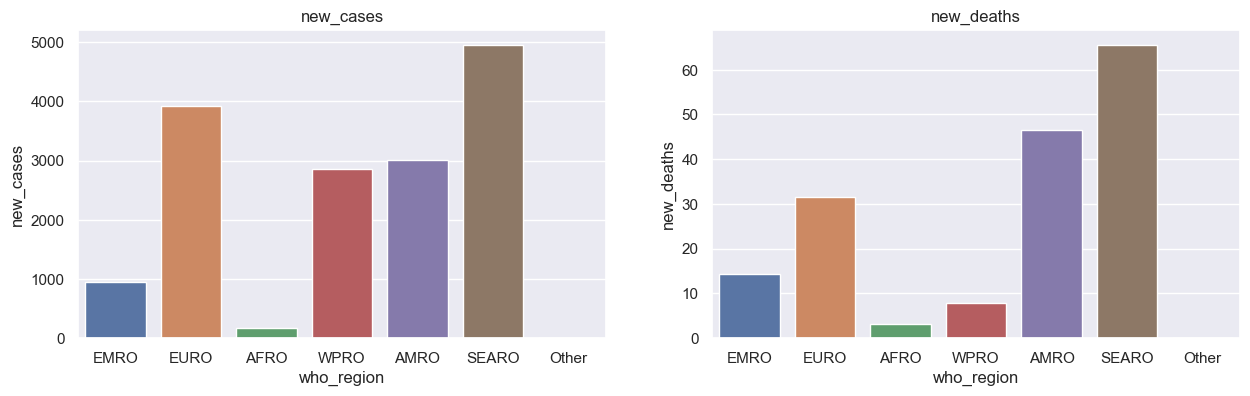

In [70]:
fig,ax=plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='who_region',y='new_cases',data=df,errorbar=None,ax=ax[0]);
sns.barplot(x='who_region',y='new_deaths',data=df,errorbar=None,ax=ax[1]);
ax[0].set_title('new_cases')
ax[1].set_title('new_deaths')

# Top Countries

In [71]:
df.head(5)

date_reported country_code      country who_region  new_cases  \
0    2020-01-03           AF  Afghanistan       EMRO          0   
1    2020-01-04           AF  Afghanistan       EMRO          0   
2    2020-01-05           AF  Afghanistan       EMRO          0   
3    2020-01-06           AF  Afghanistan       EMRO          0   
4    2020-01-07           AF  Afghanistan       EMRO          0   

   cumulative_cases  new_deaths  cumulative_deaths  year  month month_year  
0                 0           0                  0  2020      1    2020-01  
1                 0           0                  0  2020      1    2020-01  
2                 0           0                  0  2020      1    2020-01  
3                 0           0                  0  2020      1    2020-01  
4                 0           0                  0  2020      1    2020-01

In [72]:
# who region/new case
whoregion_vs_newcase = df[df.year==2023].groupby('who_region')['new_cases'].sum().sort_values()
px.bar(whoregion_vs_newcase,title="who region/new case",width=800,height=400)

In [73]:
# who region/new deaths
whoregion_vs_newdeaths = df[df.year==2023].groupby('who_region')['new_deaths'].sum().sort_values()
fig=px.bar(whoregion_vs_newdeaths,title="who region/new deaths 2023",width=800,height=400)
fig.update(layout_showlegend=False)

In [74]:
# Filter top country in "EURO" region for 'cumulative_cases'
data=df[df['who_region']=="EURO"].groupby("country")['cumulative_cases'].max().sort_values(ascending=False)
fig=px.bar(data,title='top_country_filter who_region EURO cumulative_cases',width=1100,height=600)
fig.update(layout_showlegend=False)

In [75]:
# Filter top country in "EURO" region for 'cumulative_deaths'
data=df[df['who_region']=="EURO"].groupby("country")['cumulative_deaths'].max().sort_values(ascending=False)
fig=px.bar(data,title='top_country_filter who_region',width=1100,height=600)
fig.update(layout_showlegend=False)

In [76]:
# Filter top country in "who_region" region for 'cumulative_cases'
data=df.groupby("who_region")['cumulative_cases'].max().sort_values(ascending=False)
fig=px.bar(data,title='top_country_filter cumulative_cases',width=800,height=400)
fig.update(layout_showlegend=False)

In [77]:
# Filter top country in "who_region" region for 'cumulative_deaths'
data=df.groupby("who_region")['cumulative_deaths'].max().sort_values(ascending=False)
fig=px.bar(data,title='top_country_filter cumulative_deaths',width=800,height=400)
fig.update(layout_showlegend=False)

In [78]:
df.columns

Index(['date_reported', 'country_code', 'country', 'who_region', 'new_cases',
       'cumulative_cases', 'new_deaths', 'cumulative_deaths', 'year', 'month',
       'month_year'],
      dtype='object')

In [79]:
data_largest=df.groupby('country')['new_cases'].max().nlargest(10).sort_values(ascending=True)
fig=px.bar(data_largest,title='Top 10 Countries (new_cases)',width=800,height=400)
fig.update(layout_showlegend=False)

In [80]:
# Other show vertical :
fig=px.bar(data_largest,title="Vertical show top 10 countries new cases",width=800,height=400,orientation='h')
fig.update(layout_showlegend=False)

In [81]:
# Top 10 counties New death Vertical :
data_largest_death=df.groupby('country')['new_deaths'].max().nlargest(10).sort_values(ascending=True)
fig=px.bar(data_largest_death,title=' Top 10 counties New death ',width=800,height=400,orientation='h')
fig.update(layout_showlegend=False)

In [82]:
def Top_Counties(df,col):
  data=df.groupby('country')[col].max().nlargest(10).sort_values(ascending=True)
  fig=px.bar(data,title=f'top 10 countries of {col}',width=800,height=400,orientation='h')
  fig.update(layout_showlegend=False)
  fig.update_layout(xaxis_title='country',yaxis_title=col)
  fig.show()

In [83]:
Top_Counties(df,"new_cases")

In [84]:
Top_Counties(df,"new_deaths")

In [85]:
Top_Counties(df,"cumulative_cases")

In [86]:
Top_Counties(df,"cumulative_deaths")

In [87]:
df.columns

Index(['date_reported', 'country_code', 'country', 'who_region', 'new_cases',
       'cumulative_cases', 'new_deaths', 'cumulative_deaths', 'year', 'month',
       'month_year'],
      dtype='object')

In [88]:
# new we're going to make sub graphs by plotly.subplots

In [89]:
# 4) new cases/death cases on the (largest / smallest) 10 Dates
print("10 largest new cases per Dates:-\n ",df.groupby('date_reported')['new_cases'].max().nlargest(10).astype(float),"\n")
print("10 largest new death per Dates:-\n ",df.groupby("date_reported")['new_deaths'].max().nlargest(10).astype(float),"\n")
print("10 smallest new cases per Dates:-\n ",df.groupby('date_reported')['new_cases'].max().nsmallest(10).astype(float),"\n")
print("10 smallest new death per Dates:-\n ",df.groupby("date_reported")['new_deaths'].max().nsmallest(10).astype(float),"\n")

10 largest new cases per Dates:-
  date_reported
2022-01-12   1,265,520
2022-01-26   1,011,148
2022-01-19     968,465
2022-01-05     902,391
2022-01-16     898,407
2022-01-15     892,303
2022-01-20     856,293
2022-01-14     855,880
2022-01-09     852,951
2022-01-13     803,539
Name: new_cases, dtype: float64 

10 largest new death per Dates:-
  date_reported
2022-03-22   11,447
2021-07-21    8,786
2021-06-10    6,148
2021-02-14    5,061
2021-05-19    4,529
2021-05-24    4,454
2021-05-18    4,329
2021-04-10    4,249
2021-05-21    4,209
2021-05-12    4,205
Name: new_deaths, dtype: float64 

10 smallest new cases per Dates:-
  date_reported
2020-01-03   0
2020-01-05   0
2020-01-07   0
2020-01-08   0
2020-01-10   0
2020-01-15   0
2020-01-16   0
2020-01-04   1
2020-01-09   1
2020-01-11   1
Name: new_cases, dtype: float64 

10 smallest new death per Dates:-
  date_reported
2020-01-03   0
2020-01-04   0
2020-01-05   0
2020-01-06   0
2020-01-07   0
2020-01-08   0
2020-01-09   0
2020-01-10   0

In [90]:
# new we're going to make sub graphs by plotly.subplots
from plotly.subplots import make_subplots
import plotly.graph_objects as go
data=df.groupby('country').max()

In [91]:
df.columns

Index(['date_reported', 'country_code', 'country', 'who_region', 'new_cases',
       'cumulative_cases', 'new_deaths', 'cumulative_deaths', 'year', 'month',
       'month_year'],
      dtype='object')

In [92]:
# 1) new cases/death cases on the (largest / smallest) 10 contries
fig=make_subplots(rows=2,cols=2,subplot_titles=("Largest 10 cases/country",
                                                "Largest 10 death/country",
                                                "Smallest 10 cases/country",
                                                "Smallest 10 death/country"))
data=df.groupby('country').max()
L_new_cases= data['new_cases'].nlargest(10)
N_new_deaths= data['new_deaths'].nlargest(10)
L_cumulative_cases=data[data.cumulative_cases>=1].nsmallest(10,'cumulative_cases').cumulative_cases
L_cumulative_deaths= data[data.cumulative_deaths>=1].nsmallest(10,'cumulative_deaths').cumulative_deaths

fig.add_trace(go.Bar(x= L_new_cases.index , y =L_new_cases.values), row=1 , col=1)
fig.add_trace(go.Bar(x=N_new_deaths.index , y=N_new_deaths.values),row=1, col=2)
fig.add_trace(go.Bar(x=L_cumulative_cases.index , y=L_cumulative_cases.values),row=2, col=1)
fig.add_trace(go.Bar(x=L_cumulative_deaths.index , y=L_cumulative_deaths.values),row=2, col=2)

fig.update(layout_showlegend=False)
fig.update_layout(height=900,width=1200,
        title_text="# 1) new 'cases/death' of 'new/cumulative' of (largest / smallest) 10 contries")
fig.show()

In [93]:
# 2) new cases/death cases on the (largest / smallest) 3 region
fig=make_subplots(rows=2,cols=2,subplot_titles=("Largest 3 cases/region","Largest 3 death/region","Smallest 3 cases/region","Smallest 3 death/region"))
data=df.groupby('who_region').max()
fig.add_trace(go.Bar(x=data['new_cases'].nlargest(10).index,y=data['new_cases'].nlargest(3).values),row=1,col=1);
fig.add_trace(go.Bar(x=data['new_deaths'].nlargest(10).index,y=data['new_deaths'].nlargest(3).values),row=1,col=2);
fig.add_trace(go.Bar(x=data['cumulative_cases'].nlargest(10).index,y=data['cumulative_cases'].nsmallest(3).values),row=2,col=1);
fig.add_trace(go.Bar(x=data['cumulative_deaths'].nlargest(10).index,y=data['cumulative_deaths'].nsmallest(3).values),row=2,col=2);
fig.update(layout_showlegend=False)
fig.update_layout(height=700,width=900,title_text="# 1) new 'cases/death' of 'new/cumulative' of (largest / smallest) 3 who_region")
fig.show();

C:\Users\HP\AppData\Local\Temp\ipykernel_196\2718697570.py:3: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.



In [247]:
# 3) new cases/death cases on the (largest / smallest) 10 month_year
fig=make_subplots(rows=2,cols=2,subplot_titles=("Largest 10 Monthes New cases",
                                                "Largest 10 Monthes New deaths",
                                                "Smallest 10 Monthes New Cases",
                                                "Smallest 10 Monthes New deaths"))
data=df.groupby('country').max()
L_Monthes_C=df.groupby('month_year')['new_cases'].max().sort_values(ascending=True).nlargest(10)
L_Monthes_D=df.groupby('month_year')['new_deaths'].max().sort_values(ascending=True).nlargest(10)
L_Monthes_Ccu=df.groupby('month_year')['cumulative_cases'].max().sort_values(ascending=True).nlargest(10)
L_Monehts_Dcu=df.groupby('month_year')['cumulative_deaths'].max().sort_values(ascending=True).nlargest(10)

fig.add_trace(go.Bar(x= L_Monthes_C.index , y =L_Monthes_C.values), row=1 , col=1)
fig.add_trace(go.Bar(x=L_Monthes_D.index , y=L_Monthes_D.values),row=1, col=2)
fig.add_trace(go.Bar(x=L_Monthes_Ccu.index , y=L_Monthes_Ccu.values),row=2, col=1)
fig.add_trace(go.Bar(x=L_Monehts_Dcu.index , y=L_Monehts_Dcu.values),row=2, col=2)

fig.update(layout_showlegend=False)
fig.update_layout(height=600,width=1200,title_text="# 1) new 'cases/death' of 'new/cumulative' of (largest / smallest) 3 who_region")
fig.show();

In [248]:
L_Date_C=df.groupby('date_reported')['new_cases'].max().sort_values(ascending=False).nlargest(10)
L_Date_D=df.groupby('date_reported')['new_deaths'].max().sort_values(ascending=False).nlargest(10)
S_Date_CC=df[df.cumulative_cases>0].groupby('date_reported')['cumulative_cases'].max().sort_values(ascending=False).nsmallest(10)
S_Date_CD=df[df.cumulative_deaths>0].groupby('date_reported')['cumulative_deaths'].max().sort_values(ascending=False).nsmallest(10)

L_Date_D.reset_index()

date_reported  new_deaths
0    2022-03-22       11447
1    2021-07-21        8786
2    2021-06-10        6148
3    2021-02-14        5061
4    2021-05-19        4529
5    2021-05-24        4454
6    2021-05-18        4329
7    2021-04-10        4249
8    2021-05-21        4209
9    2021-05-12        4205

In [96]:
N_largetst=df.groupby('date_reported')['new_cases'].max().nlargest(10)


In [291]:
# 2) new cases/death cases on the (largest / smallest) 10 date_reported

L_Date_C=df.groupby('date_reported')['new_cases'].max().nlargest(10).reset_index()
L_Date_D=df.groupby('date_reported')['new_deaths'].max().nlargest(10).reset_index()
S_Date_CC=df[df.new_cases>0.9].groupby('date_reported')['new_cases'].max().nsmallest(10).reset_index()
S_Date_CD=df[df.new_deaths>0.9].groupby('date_reported')['new_deaths'].max().nsmallest(10).reset_index()

fig1=px.bar(L_Date_C,y='new_cases', hover_data = ['date_reported'],title='Largest date reported New_Cases',width=700,height=300)
fig2=px.bar(L_Date_D,y='new_deaths', hover_data = ['date_reported'],title='Largest date reported new_deaths',width=700,height=300)
fig3=px.bar(S_Date_CC,y='new_cases', hover_data = ['date_reported'],title='Largest date reported New_Cases',width=700,height=300)
fig4=px.bar(S_Date_CD,y='new_deaths', hover_data = ['date_reported'],title='Largest date reported new_deaths',width=700,height=300)

fig1.show()
fig2.show()
fig3.show()
fig4.show()

In [280]:
L_Date_C

date_reported  new_cases
0    2022-01-12    1265520
1    2022-01-26    1011148
2    2022-01-19     968465
3    2022-01-05     902391
4    2022-01-16     898407
5    2022-01-15     892303
6    2022-01-20     856293
7    2022-01-14     855880
8    2022-01-09     852951
9    2022-01-13     803539

In [275]:
L_Date_C=df.groupby('date_reported')['new_cases'].max().nlargest(10).reset_index()
L_Date_C
px.bar(L_Date_C,y='new_cases', hover_data = ['date_reported'],title='Largest date reported New Cases',width=700,height=300)

# Create Easy Maps

In [99]:
df_all_max=df.groupby('country').max()
df_all_total=df.groupby('country').sum()

df_2020_max=df[df.year==2020].groupby('country').max()
df_2021_max=df[df.year==2021].groupby('country').max()
df_2022_max=df[df.year==2022].groupby('country').max()
df_2023_max=df[df.year==2023].groupby('country').max()

df_new_cases_2020=df[df.year==2020].groupby('country')['new_cases'].max()
df_new_cases_2021=df[df.year==2021].groupby('country')['new_cases'].max()
df_new_cases_2022=df[df.year==2022].groupby('country')['new_cases'].max()
df_new_cases_2023=df[df.year==2023].groupby('country')['new_cases'].max()

df_new_deaths_2020=df[df.year==2020].groupby('country')['new_deaths'].max()
df_new_deaths_2021=df[df.year==2021].groupby('country')['new_deaths'].max()
df_new_deaths_2022=df[df.year==2022].groupby('country')['new_deaths'].max()
df_new_deaths_2023=df[df.year==2023].groupby('country')['new_deaths'].max()

In [100]:
All_Covid_19=px.choropleth(df_all_max, 
            locations=df_all_max.index,
            locationmode='country names', 
            color=df_all_max['cumulative_cases'],
            width= 1000, height= 600, 
            title='World wide All Cases covid-19 cases', 
            color_continuous_scale='Greens')  # Try Greens, Purples, Blues, Reds
All_Covid_19.show()

In [101]:
def choro_mapp_NewCases (year):
    data=df[df.year==year].groupby('country').max()
    fig=px.choropleth(
                    data, 
                    locations   =data.index,
                    locationmode='country names', 
                    color       =data['cumulative_cases'],
                    width       = 800,
                    height      = 400, 
                    title       =f'World wide All Cases covid-19 cases of {year}', 
                    color_continuous_scale='Blues')  # Try Greens, Purples, Blues, Reds
    fig.show()

def choro_mapp_NewDeaths (year):
    data=df[df.year==year].groupby('country').max()
    fig=px.choropleth(
                    data, 
                    locations   =data.index,
                    locationmode='country names', 
                    color       =data['cumulative_deaths'],
                    width       = 800,
                    height      = 400, 
                    title       =f'World wide All Cases covid-19 deaths of {year}', 
                    color_continuous_scale='Reds')  # Try Greens, Purples, Blues, Reds
    fig.show()

In [102]:
choro_mapp_NewCases  (2020)
choro_mapp_NewCases  (2021)
choro_mapp_NewCases  (2022)
choro_mapp_NewCases  (2023)

choro_mapp_NewDeaths (2020)
choro_mapp_NewDeaths (2021)
choro_mapp_NewDeaths (2022)
choro_mapp_NewDeaths (2023)

# More Sophisticated Maps

In [103]:
data = dict(
        type         = 'choropleth',                    # Mapping Type
        locations    = df_2021_max.index,               # Country name list on our selection data
        locationmode = 'country names',                 # as defult selection
        z            = df_2021_max['cumulative_cases'], # color variation upon column values.
        text         = df_2021_max.index,               # The textual information to be displayed for each country on hover.
        colorscale   = 'agsunset',                 
        reversescale = False,
        marker       = dict(line = dict(color='white',width=1)),
        colorbar     = {'title':'cumulative_cases'})
layout = dict(title = 'World wide Cumulative Cases in 2021',
             geo = dict(showframe = False, projection = {'type':'mollweide'}))   # equirectangular , mollweide


In [104]:
go.Figure(data=[data],layout=layout)

# Save the figure

In [105]:
# !pip install -U kaleido

In [106]:
# All_Covid_19.write_html('choro_mapp_NewCases.html')

# Exercises
    * Task 1: Create a new column called 'season' that specify {'Winter', 'Spring', 'Summer', 'Autumn'}
    * Task 2: Filter by 'season': Find Total Deaths and Total new cases per season. Visualize it
    * Task 3: Filter by 'region' and 'season' : Find Total Deaths and Total new cases per season. Visualize it

    # Task 1: Create a new column called 'season' that specify {'Winter', 'Spring', 'Summer', 'Autumn'}

In [109]:
#  Task 1
# 12,1,2 winter
# 3,4,5 spring
# 6,7,8 summer
# 9,10,11 autumn

def get_season(month):
    if month in [12,1,2]:
        return 'winter'
    elif month in [3,4,5]:
        return 'spring'
    elif month in [6,7,8]:
        return 'summer'
    elif month in [9,10,11]:
        return 'autumn'

df['season']=df.month.apply(get_season) 

In [110]:
df.columns

Index(['date_reported', 'country_code', 'country', 'who_region', 'new_cases',
       'cumulative_cases', 'new_deaths', 'cumulative_deaths', 'year', 'month',
       'month_year', 'season'],
      dtype='object')

In [126]:
case_season = df.groupby('season')['new_cases'].sum().astype(float)
deaths_season = df.groupby('season')['new_deaths'].sum().astype(float)

case_season_20 = df[df.year==2020].groupby('season')['new_cases'].sum().astype(float)
case_season_21 = df[df.year==2021].groupby('season')['new_cases'].sum().astype(float)
case_season_22 = df[df.year==2022].groupby('season')['new_cases'].sum().astype(float)
case_season_23 = df[df.year==2023].groupby('season')['new_cases'].sum().astype(float)

deaths_season_20 = df[df.year==2020].groupby('season')['new_deaths'].sum().astype(float)
deaths_season_21 = df[df.year==2021].groupby('season')['new_deaths'].sum().astype(float)
deaths_season_22 = df[df.year==2022].groupby('season')['new_deaths'].sum().astype(float)
deaths_season_23 = df[df.year==2023].groupby('season')['new_deaths'].sum().astype(float)


In [139]:
case_season_20

season
autumn   38,204,517
spring    5,950,985
summer   19,632,275
winter   19,149,304
Name: new_cases, dtype: float64

    # Task 2: Filter by 'season': Find Total Deaths and Total new cases per season. Visualize it

In [176]:
def season (year=df.year):
    fig=make_subplots(rows=2,cols=2,
                    subplot_titles=("Cases per Season",
                                    "Deaths per Season",
                                    "cumulative_cases per Season",
                                    "cumulative_deaths per Season"))
    data=df[df.year==year].groupby('season').sum()

    fig.add_trace(go.Bar(x=data['new_cases'].index,y=data['new_cases'].values),row=1,col=1)
    fig.add_trace(go.Bar(x=data['new_deaths'].index,y=data['new_deaths'].values),row=1,col=2)
    fig.add_trace(go.Bar(x=data['cumulative_cases'].index,y=data['cumulative_cases'].values),row=2,col=1)
    fig.add_trace(go.Bar(x=data['cumulative_deaths'].index,y=data['cumulative_deaths'].values),row=2,col=2)

    fig.update(layout_showlegend=False)
    fig.update_layout(height=900,width=1200,title_text=f"Total 'cases/death' of 'new/cumulative' by (Season)\n {year}")
    fig.show()

In [186]:
season (2020)
season (2021)
season (2022)

In [190]:
df.who_region.unique()

array(['EMRO', 'EURO', 'AFRO', 'WPRO', 'AMRO', 'SEARO', 'Other'],
      dtype=object)

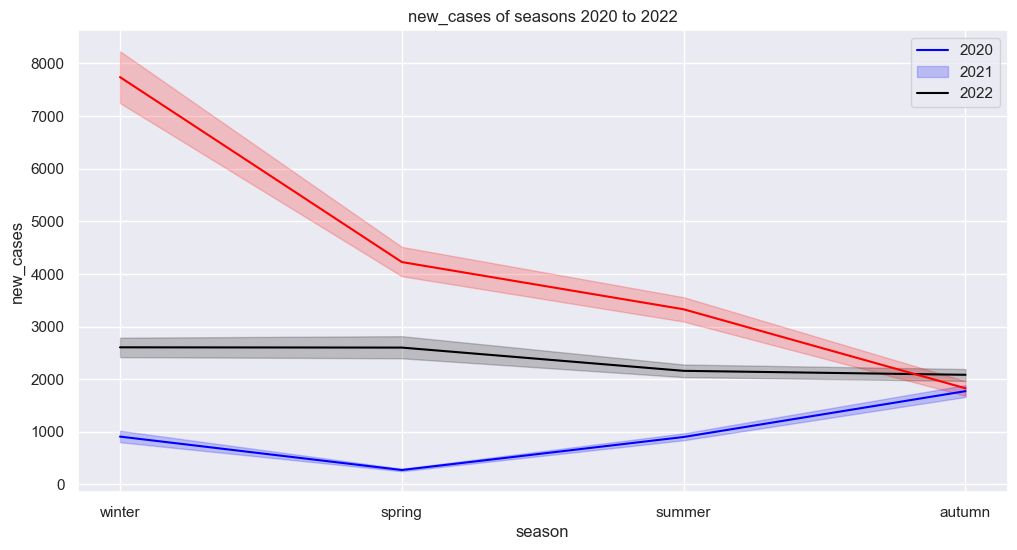

In [200]:
# new_cases per season from 2020 : 2022
plt.figure(figsize=(12,6))
sns.lineplot(x='season',y='new_cases',data=df[df.year==2020],color='blue')
sns.lineplot(x='season',y='new_cases',data=df[df.year==2021],color='black')
sns.lineplot(x='season',y='new_cases',data=df[df.year==2022],color='red')
plt.title('new_cases of seasons 2020 to 2022')
plt.legend(['2020','2021','2022'])

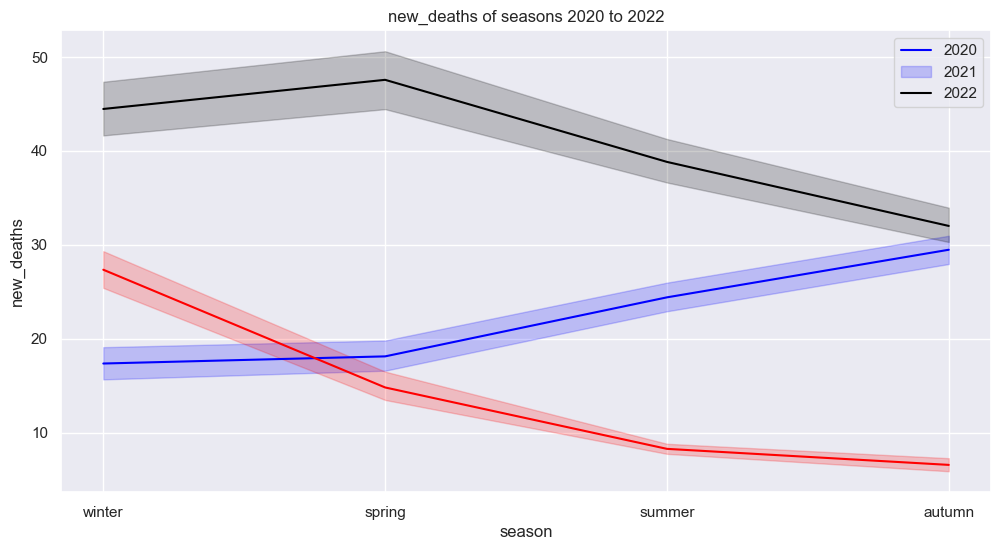

In [201]:
# new_deaths per season from 2020 : 2022
plt.figure(figsize=(12,6))
sns.lineplot(x='season',y='new_deaths',data=df[df.year==2020],color='blue')
sns.lineplot(x='season',y='new_deaths',data=df[df.year==2021],color='black')
sns.lineplot(x='season',y='new_deaths',data=df[df.year==2022],color='red')
plt.title('new_deaths of seasons 2020 to 2022')
plt.legend(['2020','2021','2022'])

In [205]:
df.groupby('season')['new_cases'].describe()

count  mean    std     min  25%  50%  75%       max
season                                                     
autumn 64,701 1,893  9,247 -12,838    0   22  483   300,096
spring 65,412 2,366 15,806  -2,461    0   13  316   621,328
summer 65,412 2,128 11,346     -55    0   25  421   406,321
winter 68,493 3,609 23,558    -197    0    5  478 1,265,520

    # Task 3: Filter by 'region' and 'season' : Find Total Deaths and Total new cases per season. Visualize it

In [225]:
df.groupby(['who_region','season'])[['new_cases',]].sum().astype(float)

new_cases
who_region season            
AFRO       autumn   1,193,001
           spring   1,301,978
           summer   3,422,247
           winter   3,549,695
AMRO       autumn  32,761,329
           spring  29,489,352
           summer  45,481,066
           winter  80,130,459
EMRO       autumn   4,540,830
           spring   4,837,562
           summer   7,130,214
           winter   6,727,483
EURO       autumn  54,046,533
           spring  60,365,228
           summer  40,308,819
           winter 116,477,065
Other      autumn           0
           spring          61
           summer           0
           winter         703
SEARO      autumn  10,584,108
           spring  20,929,307
           summer  15,238,774
           winter  13,998,886
WPRO       autumn  19,370,738
           spring  37,817,239
           summer  27,637,457
           winter  26,300,252

In [243]:
def season_region_deatils (who_region):
    fig=make_subplots(rows=2,cols=2,
                    subplot_titles=("Cases per Season",
                                    "Deaths per Season",
                                    "cumulative_cases per Season",
                                    "cumulative_deaths per Season"))
    data=df[df.who_region==who_region].groupby('season').sum()

    fig.add_trace(go.Bar(x=data['new_cases'].index,y=data['new_cases'].values),row=1,col=1)
    fig.add_trace(go.Bar(x=data['new_deaths'].index,y=data['new_deaths'].values),row=1,col=2)
    fig.add_trace(go.Bar(x=data['cumulative_cases'].index,y=data['cumulative_cases'].values),row=2,col=1)
    fig.add_trace(go.Bar(x=data['cumulative_deaths'].index,y=data['cumulative_deaths'].values),row=2,col=2)

    fig.update(layout_showlegend=False)
    fig.update_layout(height=900,width=1200,title_text=f"Total 'cases/death' & 'new/cumulative' in (Season) in {who_region}")
    fig.show()

def region_season_deatils (season):
    fig=make_subplots(rows=2,cols=2,
                    subplot_titles=("Cases per Season",
                                    "Deaths per Season",
                                    "cumulative_cases per Season",
                                    "cumulative_deaths per Season"))
    data=df[df.season==season].groupby('who_region').sum()

    fig.add_trace(go.Bar(x=data['new_cases'].index,y=data['new_cases'].values),row=1,col=1)
    fig.add_trace(go.Bar(x=data['new_deaths'].index,y=data['new_deaths'].values),row=1,col=2)
    fig.add_trace(go.Bar(x=data['cumulative_cases'].index,y=data['cumulative_cases'].values),row=2,col=1)
    fig.add_trace(go.Bar(x=data['cumulative_deaths'].index,y=data['cumulative_deaths'].values),row=2,col=2)

    fig.update(layout_showlegend=False)
    fig.update_layout(height=900,width=1200,title_text=f"Total 'cases/death'&'new/cumulative' by (Season) in {season}")
    fig.show()

In [234]:
print(df.who_region.unique())
print(df.season.unique())

['EMRO' 'EURO' 'AFRO' 'WPRO' 'AMRO' 'SEARO' 'Other']
['winter' 'spring' 'summer' 'autumn']


In [236]:
season_region_deatils ('EMRO')
season_region_deatils ('EURO')
season_region_deatils ('AFRO')
season_region_deatils ('WPRO')
season_region_deatils ('AMRO')
season_region_deatils ('SEARO')
season_region_deatils ('Other')

In [244]:
# ['winter' 'spring' 'summer' 'autumn']
region_season_deatils ("winter")
region_season_deatils ("spring")
region_season_deatils ("summer")
region_season_deatils ("autumn")